# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [11]:
%matplotlib inline
    
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [12]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]) \
    .stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

<Axes: xlabel='date'>

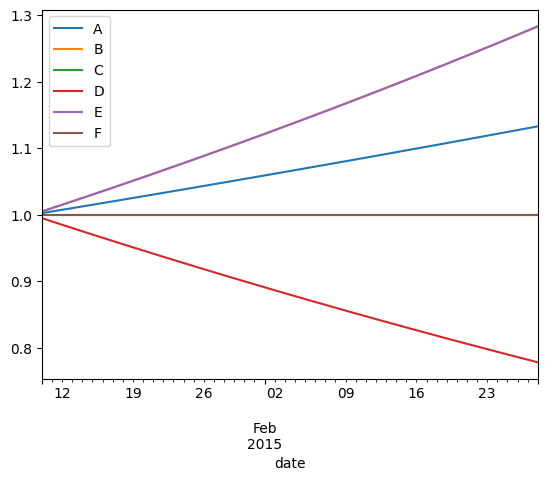

In [13]:
prices.plot()

In [14]:
prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [15]:
factor.head(10)

date         
2015-01-15  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-16  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-17  A    3.0
            B    4.0
dtype: float64

In [16]:
factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 3), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [17]:
factor_data.head(10)

1D        3D  factor   group  factor_quantile
date       asset                                                   
2015-01-15 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4
           C      0.0000  0.000000     2.0  Group1                2
           D     -0.0050 -0.014925     1.0  Group2                1
2015-01-16 A      0.0025  0.007519     3.0  Group1                3
           D     -0.0050 -0.014925     1.0  Group2                1
           E      0.0050  0.015075     4.0  Group1                4
           F      0.0000  0.000000     2.0  Group2                2
2015-01-17 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4

In [18]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

TypeError: Cannot perform min with non-ordered Categorical

<Figure size 640x480 with 0 Axes>

In [9]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)

TypeError: Cannot perform min with non-ordered Categorical

<Figure size 640x480 with 0 Axes>

In [10]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)

TypeError: Cannot perform min with non-ordered Categorical

<Figure size 640x480 with 0 Axes>